# Responda

## 1) Quantas vezes um aluno precisa fazer uma determinada disicplina para ter aprovação? <br>
## a) Por disciplina?<br>
## b) Geral (considerando as 7 disciplinas)?

In [1]:
### Libraries necessary to run this IPython Notebook

!pip install folium
!pip install geocoder
!pip install tqdm

In [2]:
# Load relevant libraries
import matplotlib
import folium
import geocoder
from tqdm import tqdm
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 8)

Populating the interactive namespace from numpy and matplotlib


In [3]:
# Importar as bibliotecas necessárias
import pandas as pd
# Atribuir o nome da planilha para a variável "arquivo"
arquivo = 'imd_notas.xlsx'
# Carregar a base de dados para um objeto pandas.io.excel.ExcelFile
excel = pd.ExcelFile(arquivo)
# Imprimir o nome das planilhas
print(excel.sheet_names)
# Carregar a planilha excel para um objeto dataframe
dados = excel.parse(0)
# Imprimir as cinco primeiras linhas do dataframe
dados.head()

['Notas']


,a_ID,CEP,ano_ingresso,periodo_ingresso,status,ano_disciplina,periodo_disciplina,nota,disciplina_ID,status.disciplina,enen-nota
0,0,59015430,2014,1,CANCELADO,2014,2,2.6,0,Reprovado,618.0
1,0,59015430,2014,1,CANCELADO,2015,1,8.0,0,Aprovado,618.0
2,1,59073120,2014,1,CANCELADO,2014,2,0.1,0,Reprovado,615.0
3,2,59072580,2014,1,ATIVO,2014,2,6.1,0,Aprovado,600.0
4,3,59088150,2014,1,ATIVO,2014,1,3.0,0,Reprovado,673.0


# 1a 

In [4]:
import numpy as np

status_by_student = dados.pivot_table(index=["disciplina_ID", "a_ID"], columns=["status.disciplina"],
               aggfunc={"status.disciplina":len})

status_by_student = status_by_student.dropna(axis=0)

status_by_student.columns = status_by_student.columns.droplevel(0)
status_by_student = pd.DataFrame(status_by_student)

status_by_discipline = status_by_student.pivot_table(index=["disciplina_ID"], aggfunc={"Aprovado":np.sum, "Reprovado":np.sum})

status_by_discipline = pd.DataFrame(status_by_discipline)

mean_by_discipline = pd.DataFrame((status_by_discipline["Aprovado"]+status_by_discipline["Reprovado"])/status_by_discipline["Aprovado"])

## A seguir temos a média de vezes que um aluno precisa cursar uma determinada disciplina do presente data set para ter aprovação na mesma(para cada disciplina separadamente)

In [5]:
mean_by_discipline.head(8)

,0
disciplina_ID,
0,2.179487
1,2.058824
2,2.000000
3,2.189655
4,2.000000
5,2.347826
6,2.250000


## A seguir temos a média de vezes que um aluno precisa cursar uma disciplina do presente data set para ter aprovação na mesma(para qualquer disciplina do data set)

# 1b

In [6]:
pd.DataFrame({'general_mean':mean_by_discipline.mean()})

,general_mean
0,2.146542


## 2) Quais as regiões tem mais índices de aprovação nos componentes curriculares? Hist.

In [7]:
#2
import matplotlib.pyplot as plt
from numpy import arange

aprovation_by_CEP = dados.pivot_table(index=["CEP"], columns=["status.disciplina"], aggfunc={"status.disciplina":len},fill_value=0)

aprovation_by_CEP.columns = aprovation_by_CEP.columns.droplevel(0)
aprovation_by_CEP = pd.DataFrame(aprovation_by_CEP.reset_index().rename_axis(None, axis=1))

aprovation_by_CEP = aprovation_by_CEP.sort_values('Aprovado',  ascending=[False])
aprovation_by_CEP.head(20)

,CEP,Aprovado,Reprovado
0,0,162,127
566,59290000,64,45
592,59570000,49,37
590,59550000,43,10
565,59280000,31,35
609,59700000,28,2
521,59152600,20,7
606,59650000,20,5
575,59347000,19,8
497,59151250,17,10


In [8]:
ceps = aprovation_by_CEP

# We also create two additional columns for lattitude and longitude.
ceps['lat'], ceps['long'] = [0, 0]

ceps = pd.DataFrame(ceps.reset_index().rename_axis(None, axis=0))

del ceps["index"]

ceps.head(10)

,CEP,Aprovado,Reprovado,lat,long
0,0,162,127,0,0
1,59290000,64,45,0,0
2,59570000,49,37,0,0
3,59550000,43,10,0,0
4,59280000,31,35,0,0
5,59700000,28,2,0,0
6,59152600,20,7,0,0
7,59650000,20,5,0,0
8,59347000,19,8,0,0
9,59151250,17,10,0,0


In [9]:
# Now we use Geocoder in a loop to gecode the regions and update our dataframe
# Wait until the In{*} indicator on the lefthand side changes to a number before proceeding

for i in tqdm(range(len(ceps))):
    g = geocoder.google(ceps.loc[i,'CEP'])
    ceps.ix[i,'lat'] = g.lat
    ceps.ix[i,'long'] = g.lng
print('Geocoding complete!')

  0%|          | 0/627 [00:00<?, ?it/s]C:\ProgramData\Anaconda3\JC\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
100%|██████████| 627/627 [09:53<00:00,  1.06it/s]


Geocoding complete!


In [10]:
ceps.to_csv('indices_by_cep.csv')
ceps = pd.read_csv('indices_by_cep.csv')
ceps.head(10)

,Unnamed: 0,CEP,Aprovado,Reprovado,lat,long
0,0,0,162,127,44.200797,24.502298
1,1,59290000,64,45,-5.776116,-35.368568
2,2,59570000,49,37,-5.613101,-35.434360
3,3,59550000,43,10,-5.443089,-35.871614
4,4,59280000,31,35,-5.894935,-35.434360
5,5,59700000,28,2,-5.645558,-37.851231
6,6,59152600,20,7,-5.889106,-35.208151
7,7,59650000,20,5,-5.465272,-37.040034
8,8,59347000,19,8,-6.676071,-36.932609
9,9,59151250,17,10,-5.873118,-35.215692


## O mapa de calor a seguir ilustra os indices de aprovação por região 
Como podemos observar no mapa, Natal e Parnamirin têm os maiores indices de aprovação do presente Data Set

In [17]:
from folium.plugins import HeatMap

# Set map center and zoom level
mapc = [0, 30]
zoom = 2

coordinates = []

ceps['inice'] = ceps['Aprovado']/(ceps['Aprovado']+ceps['Reprovado'])

for i in range(len(ceps)):
    # eliminate items with'nan' element
    if all(~np.isnan([ceps.ix[i,'lat'], ceps.ix[i,'long'], ceps.ix[i,'inice']])):
        coordinates.append([ceps.ix[i,'lat'], ceps.ix[i,'long'], ceps.ix[i,'inice']])

# Create map object
m = folium.Map(location=mapc,
                    zoom_start=zoom)

HeatMap(coordinates).add_to(m)

m

## 3) Como estão caracterizados a estatística de notas das diversas disciplinas que compoe o
## dataset? Boxplot <br>
## a) Período (ano) <br>
## b) Geral 

# 3a

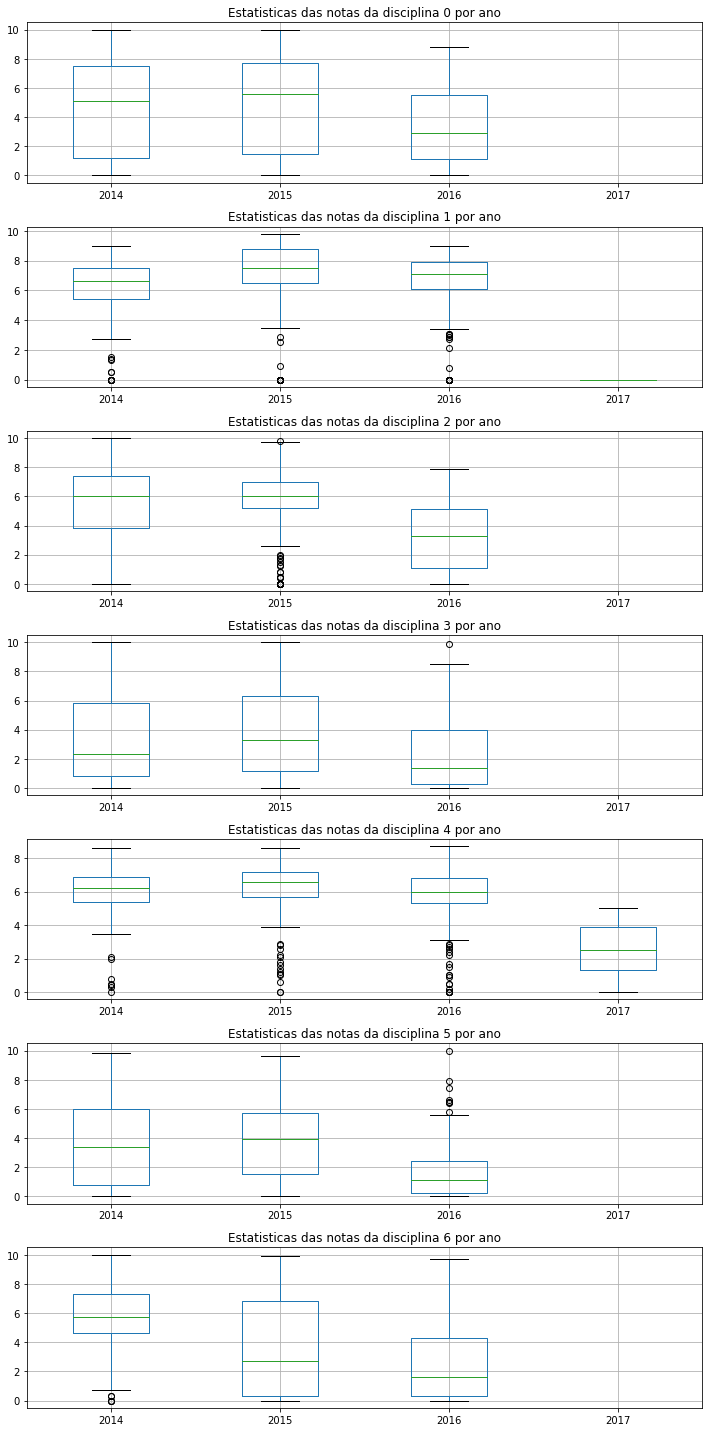

In [19]:
fig, axes = plt.subplots(nrows=7, ncols=1, figsize=(10,20))

discipline_ID = pd.DataFrame()

for i in range(7):
    axes[i].set_title('Estatisticas das notas da disciplina '+str(i)+' por ano')   
    for x in range(2014, 2018):
        discipline_ID[x] = pd.Series(dados.loc[(dados['disciplina_ID']==i) & (dados['ano_disciplina']==x)]['nota'].tolist())
    discipline_ID.boxplot(ax=axes[i], return_type='both')    
    
plt.tight_layout()

plt.show()

### Como podemos ver nos boxplots, obteve-se os seguindes dados:
####  disciplina 0:
        2014:
            menor nota: 0
            maior nota: 10
               mediana: +- 5.5
            1/4 da turma ficou com média abaixo de 1.2
            1/4 da turma ficou com média entre 1.2 e 5.5
            1/4 da turma ficou com média entre 5.5 e 7.5
            1/4 da turma ficou com média entre 7.5 e 10.0
        2015:
            menor nota: 0
            maior nota: 10
               mediana: +- 5.8
            1/4 da turma ficou com média abaixo de 1.5
            1/4 da turma ficou com média entre 1.5 e 5.8
            1/4 da turma ficou com média entre 5.8 e 7.8
            1/4 da turma ficou com média entre 7.8 e 10.0
        2016:
            menor nota: 0
            maior nota: 8.8
               mediana: +- 2.9
            1/4 da turma ficou com média abaixo de 1.2
            1/4 da turma ficou com média entre 1.2 e 2.9
            1/4 da turma ficou com média entre 2.9 e 5.7
            1/4 da turma ficou com média entre 5.7 e 8.8
            
####  disciplina 1:
        2014:
            menor nota: 2.8
            maior nota: 9
               mediana: +- 6.6
            1/4 da turma ficou com média entre 2.8 e 5.3
            1/4 da turma ficou com média entre 5.3 e 6.6
            1/4 da turma ficou com média entre 6.6 e 7.5
            1/4 da turma ficou com média entre 7.5 e 9.0
        2015:
            menor nota: 3.5
            maior nota: 9.8
               mediana: +- 7.5
            1/4 da turma ficou com média entre 3.5 e 6.5
            1/4 da turma ficou com média entre 6.5 e 7.5
            1/4 da turma ficou com média entre 7.5 e 8.8
            1/4 da turma ficou com média entre 8.8 e 9.8
        2016:
            menor nota: 3.4
            maior nota: 9.0
               mediana: +- 7.2
            1/4 da turma ficou com média entre 3.4 e 6.0
            1/4 da turma ficou com média entre 6.0 e 7.2
            1/4 da turma ficou com média entre 7.2 e 8.0
            1/4 da turma ficou com média entre 8.0 e 9.0
            
####  disciplina 2:
        2014:
            menor nota: 0
            maior nota: 10
               mediana: +- 6.0
            1/4 da turma ficou com média abaixo de 3.9
            1/4 da turma ficou com média entre 3.9 e 6.0
            1/4 da turma ficou com média entre 6.0 e 7.4
            1/4 da turma ficou com média entre 7.4 e 10.0
        2015:
            menor nota: 2.6
            maior nota: 9.8
               mediana: +- 6.0
            1/4 da turma ficou com média entre 2.6 e 5.2
            1/4 da turma ficou com média entre 5.2 e 6.0
            1/4 da turma ficou com média entre 6.0 e 7.0
            1/4 da turma ficou com média entre 7.0 e 9.8
        2016:
            menor nota: 0
            maior nota: 7.9
               mediana: +- 3.3
            1/4 da turma ficou com média abaixo de 1.2
            1/4 da turma ficou com média entre 1.2 e 3.3
            1/4 da turma ficou com média entre 3.3 e 5.2
            1/4 da turma ficou com média entre 5.2 e 7.9
            
####  disciplina 3:
        2014:
            menor nota: 0
            maior nota: 10
               mediana: +- 2.4
            1/4 da turma ficou com média abaixo de 0.8
            1/4 da turma ficou com média entre 0.8 e 2.4
            1/4 da turma ficou com média entre 2.4 e 5.8
            1/4 da turma ficou com média entre 5.8 e 10.0
        2015:
            menor nota: 0
            maior nota: 10
               mediana: +- 3.4
            1/4 da turma ficou com média abaixo de 1.2
            1/4 da turma ficou com média entre 1.2 e 3.4
            1/4 da turma ficou com média entre 3.4 e 6.4
            1/4 da turma ficou com média entre 6.4 e 10.0
        2016:
            menor nota: 0
            maior nota: 8.5
               mediana: +- 1.5
            1/4 da turma ficou com média abaixo de 0.3
            1/4 da turma ficou com média entre 0.3 e 1.5
            1/4 da turma ficou com média entre 1.5 e 4.0
            1/4 da turma ficou com média entre 4.0 e 8.5
            
####  disciplina 4:
        2014:
            menor nota: 3.5
            maior nota: 8.3
               mediana: +- 6.2
            1/4 da turma ficou com média entre 3.5
            1/4 da turma ficou com média entre 3.5 e 5.4
            1/4 da turma ficou com média entre 5.4 e 6.2
            1/4 da turma ficou com média entre 6.2 e 8.3
        2015:
            menor nota: 3.9
            maior nota: 8.3
               mediana: +- 6.6
            1/4 da turma ficou com média entre 3.9 e 5.7
            1/4 da turma ficou com média entre 5.7 e 6.6
            1/4 da turma ficou com média entre 6.6 e 7.2
            1/4 da turma ficou com média entre 7.2 e 8.3
        2016:
            menor nota: 3.2
            maior nota: 8.4
               mediana: +- 6.0
            1/4 da turma ficou com média ente 3.2 e 5.3
            1/4 da turma ficou com média entre 5.3 e 6.0
            1/4 da turma ficou com média entre 6.0 e 6.8
            1/4 da turma ficou com média entre 6.8 e 8.4
         2017:
            menor nota: 0
            maior nota: 5.0
               mediana: +- 2.6
            1/4 da turma ficou com média abaixo de 1.4
            1/4 da turma ficou com média entre 1.4 e 2.6
            1/4 da turma ficou com média entre 2.6 e 3.9
            1/4 da turma ficou com média entre 3.9 e 5.0
         
            
####  disciplina 5:
        2014:
            menor nota: 0
            maior nota: 9.9
               mediana: +- 3.4
            1/4 da turma ficou com média abaixo de 0.8
            1/4 da turma ficou com média entre 0.8 e 3.4
            1/4 da turma ficou com média entre 3.4 e 6.0
            1/4 da turma ficou com média entre 6.0 e 9.9
        2015:
            menor nota: 0
            maior nota: 9.7
               mediana: +- 4.0
            1/4 da turma ficou com média abaixo de 1.5
            1/4 da turma ficou com média entre 1.5 e 4.0
            1/4 da turma ficou com média entre 4.0 e 5.8
            1/4 da turma ficou com média entre 5.8 e 9.7
        2016:
            menor nota: 0
            maior nota: 5.7
               mediana: +- 1.1
            1/4 da turma ficou com média abaixo de 0.2
            1/4 da turma ficou com média entre 0.2 e 1.1
            1/4 da turma ficou com média entre 1.1 e 4.2
            1/4 da turma ficou com média entre 4.2 e 5.7
            
####  disciplina 6:
        2014:
            menor nota: 0.8
            maior nota: 10
               mediana: +- 5.7
            1/4 da turma ficou com média entre 0.8 e 4.7
            1/4 da turma ficou com média entre 4.7 e 5.7
            1/4 da turma ficou com média entre 5.7 e 7.4
            1/4 da turma ficou com média entre 7.4 e 10.0
        2015:
            menor nota: 0
            maior nota: 9.9
               mediana: +- 2.8
            1/4 da turma ficou com média abaixo de 0.4
            1/4 da turma ficou com média entre 0.4 e 2.8
            1/4 da turma ficou com média entre 2.8 e 6.8
            1/4 da turma ficou com média entre 6.8 e 9.9
        2016:
            menor nota: 0
            maior nota: 9.8
               mediana: +- 1.6
            1/4 da turma ficou com média abaixo de 0.4
            1/4 da turma ficou com média entre 0.4 e 1.6
            1/4 da turma ficou com média entre 1.6 e 4.3
            1/4 da turma ficou com média entre 4.3 e 9.8
            
        

### Partindo da idéia de que a média de aprovação é 5.0, podemos concluir que a disciplina de ID igual à 1 é a que tem maior índice de aprovação, visto que em todos o anos avaliados, pelo menos 3/4 de suas turmas ficou com média acima de 5.0

# 3b

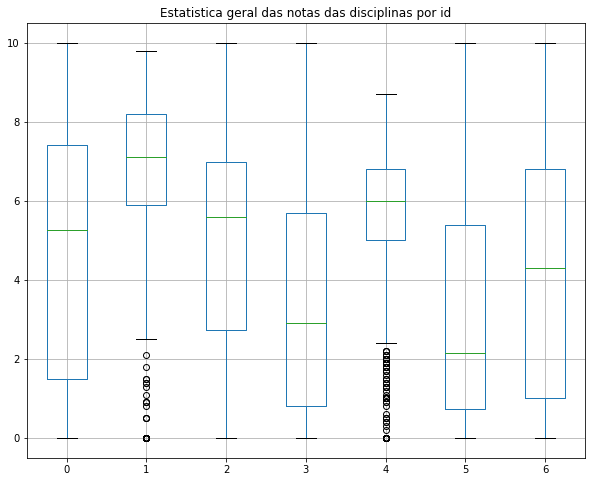

In [20]:
discipline_ID = pd.DataFrame()

for i in range(7):
    discipline_ID[i] = pd.Series(dados.loc[dados['disciplina_ID']==i]['nota'].tolist())
discipline_ID.boxplot()

plt.title('Estatistica geral das notas das disciplinas por id')

plt.show()

### O gráfico da estatística geral reforca a resposta anterior, mostrando que 3/4 das turmas da disciplina de ID igual à 1 tem média maior que 5.0

## 4) Existe correlação entre as notas dos diferentes componentes curriculares? Dispersão

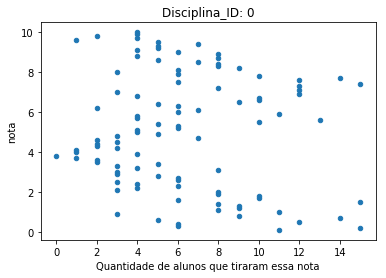

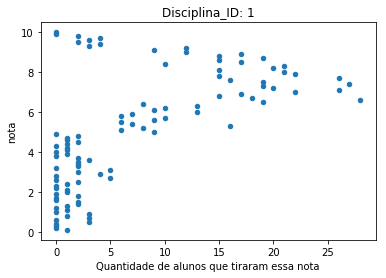

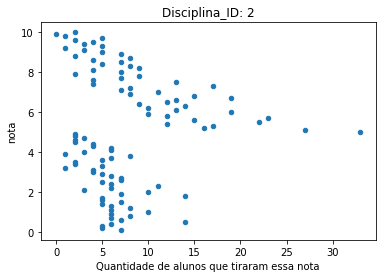

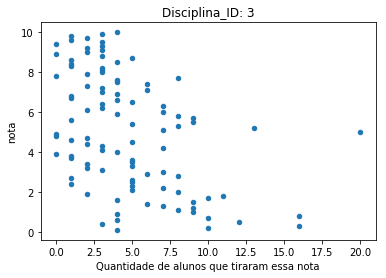

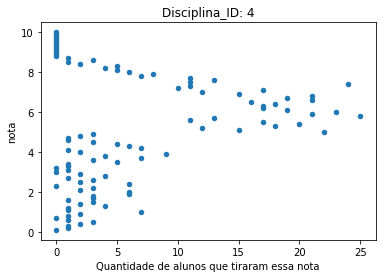

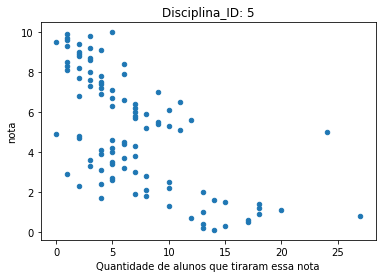

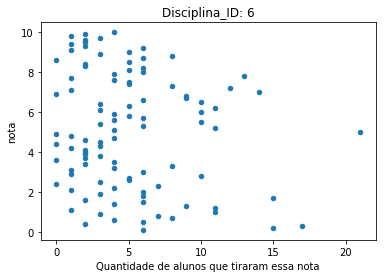

In [36]:
import numpy as np

notas = dados.pivot_table(index=["nota"], columns=["disciplina_ID"],
               aggfunc={"nota":len},fill_value=0 )

notas.columns = notas.columns.droplevel(0)
notas = pd.DataFrame(notas.reset_index().rename_axis(None, axis=1))

notas = notas[notas["nota"] != 0]

fig = plt.figure(figsize=(2,5))

for i in range(7):
    ax = fig.add_subplot()
    ax = notas.plot(kind='scatter', x=i, y='nota')
    ax.set_xlabel("Quantidade de alunos que tiraram essa nota")
    ax.set_title("Disciplina_ID: "+str(i))
    
plt.show()

### Pelos gráficos de dispersão não se percebe correlação entre as notas dos componentes curriculares

## 5) Existe uma relação entre o número médio de disciplinas cursadas por aluno e o seu
## desempenho? Dispersão

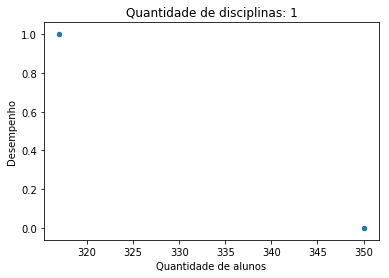

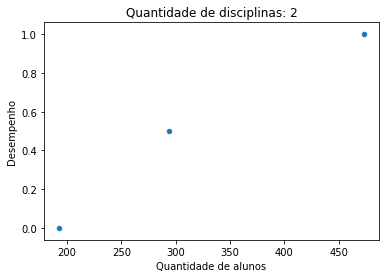

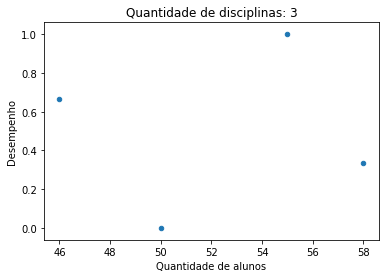

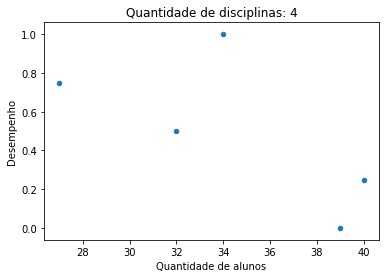

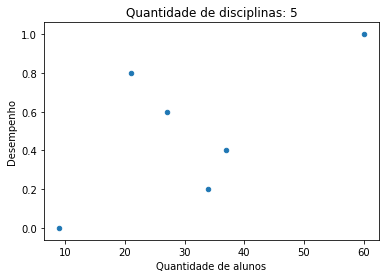

In [38]:
dados1 = dados.pivot_table(index=["a_ID",  "ano_disciplina", "periodo_disciplina", "disciplina_ID"], columns=["status.disciplina"],
               aggfunc={"status.disciplina":len},fill_value=0)

dados1.columns = dados1.columns.droplevel(0)
dados1 = pd.DataFrame(dados1.reset_index().rename_axis(None, axis=1))

dados1 = dados1.pivot_table(index=["a_ID",  "ano_disciplina", "periodo_disciplina"], aggfunc={"Aprovado":sum, "disciplina_ID":len},fill_value=0)

dados1.columns.name = None               #remove categories
dados1 = dados1.reset_index()         #index to columns

aluno_desempenho = pd.DataFrame()
aluno_desempenho["a_ID"] = dados1["a_ID"]

aluno_desempenho["quant_disciplinas"] = dados1["disciplina_ID"]

aluno_desempenho["desempenho"] = dados1["Aprovado"]/dados1["disciplina_ID"]

aluno_desempenho = aluno_desempenho.pivot_table(index=["desempenho"], columns="quant_disciplinas", aggfunc={"desempenho":len}, fill_value=0)

aluno_desempenho.columns = aluno_desempenho.columns.droplevel(0)
aluno_desempenho = pd.DataFrame(aluno_desempenho.reset_index().rename_axis(None, axis=1))


fig = plt.figure(figsize=(2,5))

for i in range(1,6):
    number = aluno_desempenho[aluno_desempenho[i] != 0]
    ax = fig.add_subplot()
    ax = number.plot(kind='scatter', x=i, y='desempenho')
    ax.set_xlabel('Quantidade de alunos')
    ax.set_title('Quantidade de disciplinas: '+str(i))
    ax.set_ylabel('Desempenho')

plt.show()

### Existe, nos gráficos de dispersão podemos observar que a quantidade de alunos que obtiveram 100% de aprovação foi maior para os alunos que cursaram 2 ou 5 disciplinas

## 6) Existe correlação entre a nota do enen e o status do aluno? Hist

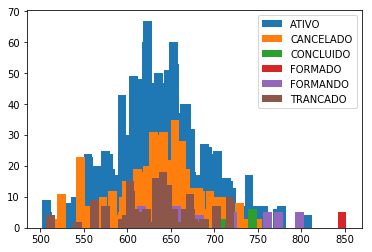

In [65]:
# Enable matplotlib plot inline
%matplotlib inline

status = dados.pivot_table(index=["enen-nota"], columns=["status"],
               aggfunc={"status":len},fill_value=0)

status.columns = status.columns.droplevel(0)
status = pd.DataFrame(status.reset_index().rename_axis(None, axis=1))

status.head(20)

ativo     = pd.DataFrame()
cancelado = pd.DataFrame()
concluido = pd.DataFrame()
formado   = pd.DataFrame()
formando  = pd.DataFrame()
trancado  = pd.DataFrame()

fig = plt.figure(figsize=(10,20))

fig, ax = plt.subplots()
ax.bar(status['enen-nota'], status['ATIVO'], 10)
ax.bar(status['enen-nota'], status['CANCELADO'], 10)
ax.bar(status['enen-nota'], status['CONCLUIDO'], 10)
ax.bar(status['enen-nota'], status['FORMADO'], 10)
ax.bar(status['enen-nota'], status['FORMANDO'], 10)
ax.bar(status['enen-nota'], status['TRANCADO'], 10)
ax.legend(['ATIVO', 'CANCELADO', 'CONCLUIDO', 'FORMADO', 'FORMANDO', 'TRANCADO'])

plt.show()

### Sim, pode-se observar que para notas maiores que 750 no ENEM, não há alunos com status cancelado ou trancado e que para alunos com notas acima de 750 no ENEM a maioria deles tá formado ou formando, também pode-se constatar que a grande maioria dos alunos que possuem os status de trancado ou cancelado tiraram notas iguais ou menores que 700 no ENEM

## 7) Existe algum componente curricular na base de dados que possui uma alta correlação
## com os dados do ENEN? Disperção

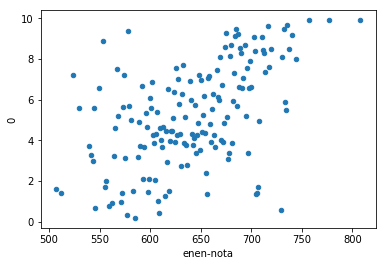

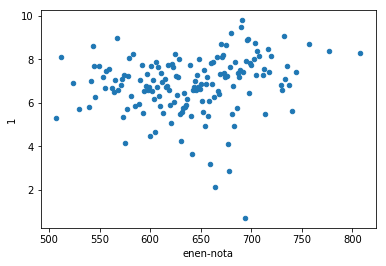

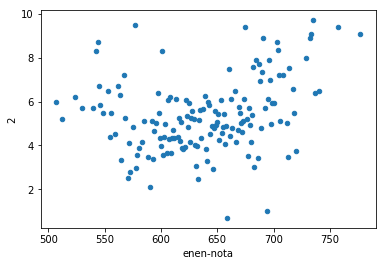

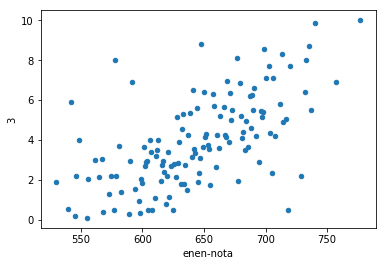

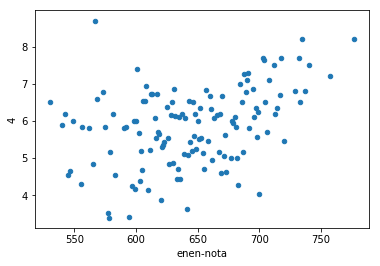

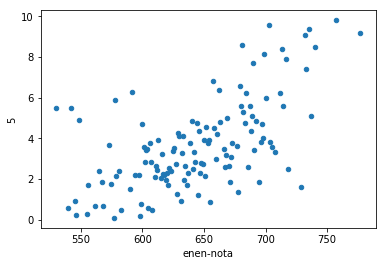

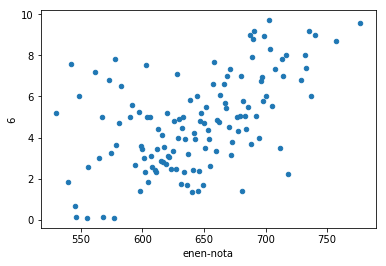

In [26]:
aprovation_by_CEP = dados.pivot_table(index=["enen-nota"], columns=["disciplina_ID"], aggfunc={"nota":np.mean},fill_value=0)


aprovation_by_CEP.columns = aprovation_by_CEP.columns.droplevel(0)
aprovation_by_CEP = pd.DataFrame(aprovation_by_CEP.reset_index().rename_axis(None, axis=1))

fig = plt.figure(figsize=(2,5))

for x in range(7):
    aprovation_by_CEP = aprovation_by_CEP.loc[aprovation_by_CEP[x] != 0]
    aprovation_by_CEP.plot(kind='scatter', x='enen-nota', y=x);

### Existe, com exceção da disciplina de ID igual à 1, foi constatado que os alunos com as melhores notas nos componentes são os que tiraram as melhores notas no enem